In [1]:
import sys  
sys.path.append("../")

In [2]:
import modules as nn
from initializers import Xavier
from losses import LossMSE as MSE
from activations import *
from utils import *

In [3]:
import torch
torch.set_grad_enabled(False)

In [4]:
import matplotlib.pyplot as plt

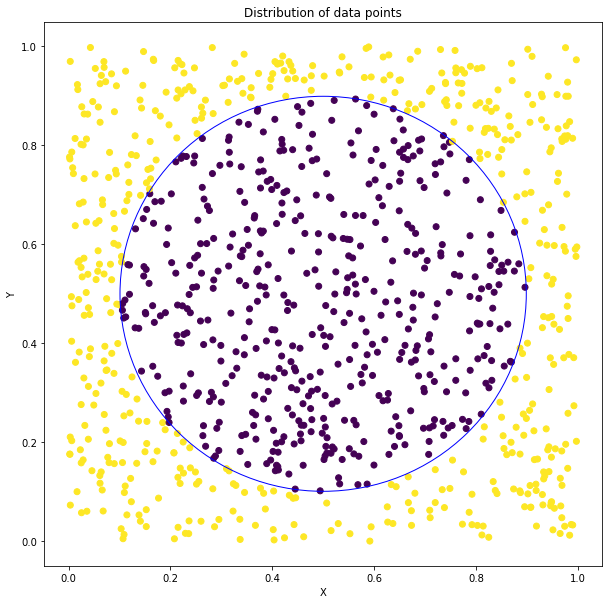

In [5]:
data, labels = get_data(1000)
#Plot the distribution of the generated data, to see how it looks like
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
plt.scatter(data[:,0].tolist(), data[:,1].tolist(), c = labels.tolist())
ax.add_patch(plt.Circle((0.5, 0.5), 1 / (math.sqrt(2*math.pi)), color='b', fill=False))
plt.savefig('disk_data.png')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Distribution of data points")
plt.show()

In [8]:
INPUT_UNITS = 2
HIDDEN_LAYERS = 3
HIDDEN_UNITS = 25
OUTPUT_UNITS = 1
# The model
model = nn.Sequential(
                nn.Linear(INPUT_UNITS, HIDDEN_UNITS),
                ReLU(),
                nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                ReLU(),
                nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                ReLU(),
                nn.Linear(HIDDEN_UNITS, OUTPUT_UNITS),
                Sigmoid()
                )

In [9]:
print(model)

layer = 1
w:torch.Size([25, 2])
b:torch.Size([1, 25])
--------------------------------------------------
layer = 2
w:torch.Size([25, 25])
b:torch.Size([1, 25])
--------------------------------------------------
layer = 3
w:torch.Size([25, 25])
b:torch.Size([1, 25])
--------------------------------------------------
layer = 4
w:torch.Size([1, 25])
b:torch.Size([1, 1])
--------------------------------------------------


In [ ]:
# Train the model
